# Laboratorio Regresión Logistica 

## Librerias y Data Set

In [106]:
import pandas as pd 
import numpy as np
import matplotlib as mt
from pandas import DataFrame
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("wine_data.csv")

In [9]:
df.head(2)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


Como podemos ver en la primera revisión que tenemos vemos que todas nuestras columnas tienen datos completos por lo cual podemos seguir con el laboratorio sin necesidad de trabajar con missing data

In [11]:
df.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.nunique()

1          3
14.23    125
1.71     133
2.43      78
15.6      62
127       52
2.8       97
3.06     131
.28       39
2.29     101
5.64     131
1.04      78
3.92     121
1065     121
dtype: int64

Como podemos ver en nuestro data set tenemos bastantes variables que estan en diferentes escalas por lo cual tenemos que arreglar esta situación, ahora en nuestra variable objetivo tenemos tres variables posibles, por lo cual necesitamos hacer unos cambios en esta cuestión para poder correr de manera correcta nuestro modelo from scratch

## Separando Variables y Ajustandolas

In [13]:
y = df['1']
X = df.drop('1', axis = 1)

In [14]:
print(y.shape, X.shape)

(177,) (177, 13)


Aca podemos ver que nuestras variables tienen el mismo largo por lo cual no hicimos nada incorrecto en nuestra partición 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)
X = DataFrame(X)

In [17]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-5.218675e-16,2.810056e-16,-3.813647e-16,-2.408619e-16,-8.028731e-17,-2.810056e-16,1.605746e-16,-6.021549e-16,-4.014366e-17,1.806465e-16,6.021549e-16,7.225858e-16,1.605746e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


Ahora que ta tenemos nuestros valores ajustados, ya podemos pasarlos a numpy array para hacer unos ultimos ajustes

In [18]:
y = y.to_numpy()
X = X.to_numpy()

In [19]:
print(y.shape,X.shape)

(177,) (177, 13)


In [20]:
y_1 = (y == 1)*1
y_2 = (y == 2)*1
y_3 = (y == 3)*1

Ahora ya tenemos nuestras 3 Y's en formato para poder trabajarlo, ya que tenemos todo listo para seguir podemos cargar nuestras funciones

## Funciones de Regresión logistica y Ajustes

In [101]:
def hypothesis(X, theta):
    z = X @ theta
    return 1/(1 + np.exp(-z))

def cost_function(X, y, theta):
    yh = hypothesis(X, theta)
    return (-1/len(X)) * np.sum(y*np.log(yh) + (1-y)*np.log(1-yh))

def gradient_descent(X, y, theta, learning_rate, max_iter = 2000):
    m = len(X)
    J = [cost_function(X, y, theta)]
    for i in range(0, max_iter):
        h = hypothesis(X, theta)
        for i in range(0, X.shape[1]):
            theta = theta - (learning_rate/m) * np.sum((h-y)*X[:, i])
        J.append(cost_function(X, y, theta))
    return J, theta

def valor_h(x_train, x_test, theta):    
    h_train = hypothesis(x_train, theta).mean()
    h_test = hypothesis(x_test, theta).mean()
    avg_h = (h_train + h_test) / 2
    return avg_h

Como podemos observar tuvimos que hacer un cambio para que las hipotesis que calcularamos fueran de forma de sigmoide, por eso creamos nuestra variable de sigmoide y la colocamos en la función

## Modelo 1 para Variable 1 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_1, test_size=0.20, random_state=42, shuffle = True)

In [29]:
print(X1_train.shape,y1_train.shape)
print(X1_test.shape,y1_test.shape)

(141, 13) (141,)
(36, 13) (36,)


In [95]:
m, n = X.shape
theta_01 = np.full((n,1), 0.5)
print(theta_01.shape)

(13, 1)


In [116]:
J1, theta1 = gradient_descent(
X1_train, y1_train, theta_01, 0.000001, 10000)

In [125]:
print(J1[len(J1)-1])

774.7081589438764


In [118]:
theta1.shape

(13, 1)

In [119]:
valor_h(X1_train, X1_test, theta_01)

0.4970440982016331

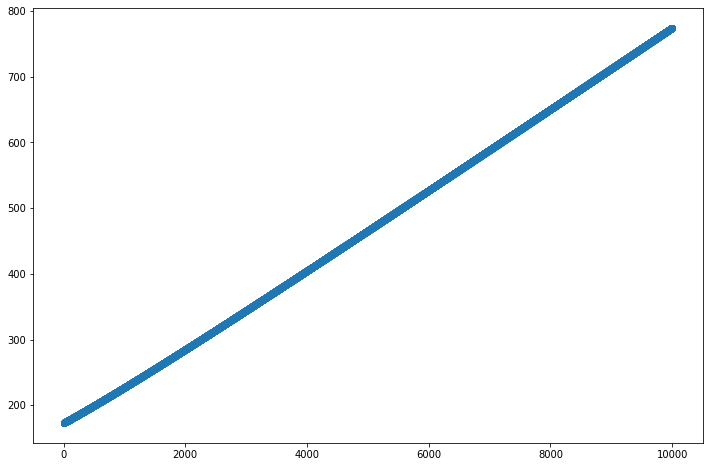

In [120]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J1)), J1)
plt.show()

## Modelo 2 para Variable 2

In [121]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_2, test_size=0.20, random_state=42, shuffle = True)

In [122]:
print(X2_train.shape,y2_train.shape)
print(X2_test.shape,y2_test.shape)

(141, 13) (141,)
(36, 13) (36,)


In [123]:
m, n = X.shape
theta_02 = np.full((n,1), 0.5)
print(theta_02.shape)

(13, 1)


In [124]:
J2, theta2 = gradient_descent(
X2_train, y2_train, theta_02, 0.000001, 10000)

In [127]:
print(J2[len(J2)-1])

255.74602204244172


In [128]:
theta2.shape

(13, 1)

In [129]:
valor_h(X2_train, X2_test, theta_02)

0.4970440982016331

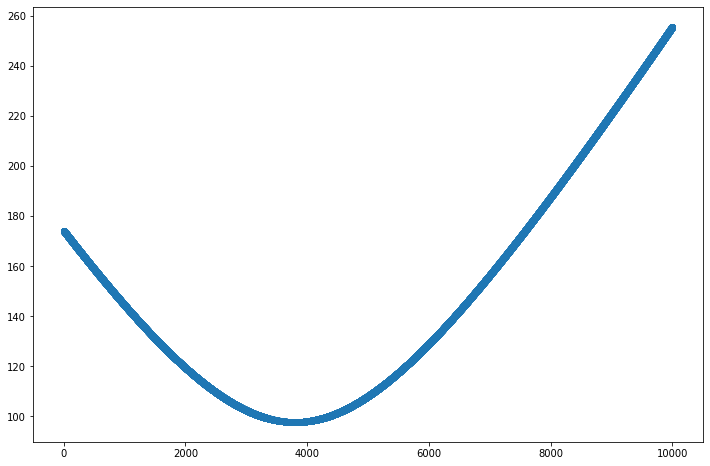

In [130]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J2)), J2)
plt.show()

## Modelo 3 para Variable 3

In [131]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y_1, test_size=0.20, random_state=42, shuffle = True)

In [132]:
print(X3_train.shape,y3_train.shape)
print(X3_test.shape,y3_test.shape)

(141, 13) (141,)
(36, 13) (36,)


In [133]:
m, n = X.shape
theta_03 = np.full((n,1), 0.5)
print(theta_03.shape)

(13, 1)


In [134]:
J3, theta3 = gradient_descent(
X3_train, y3_train, theta_03, 0.000001, 10000)

In [135]:
print(J3[len(J3)-1])

774.7081589438764


In [136]:
theta3.shape

(13, 1)

In [137]:
valor_h(X3_train, X3_test, theta_03)

0.4970440982016331

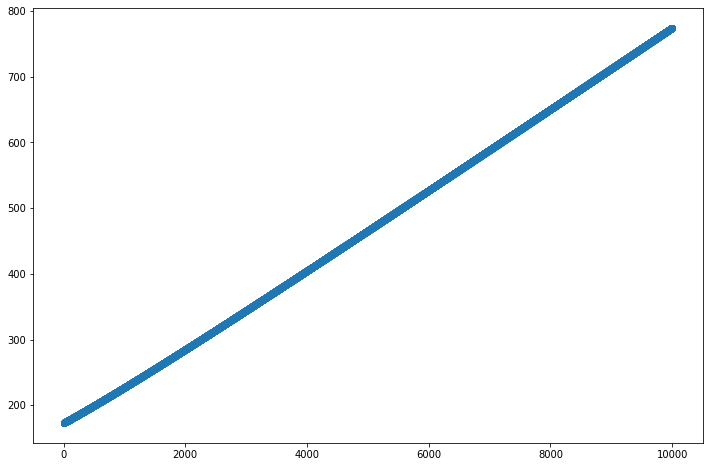

In [139]:
plt.figure(figsize = (12, 8))
plt.scatter(range(0, len(J3)), J3)
plt.show()

## Conclusión

Los valores H son similares en todas las regresiones, sin embargo, el costo de el modelo de clasificación 2 es mejor en costo, por lo cual optaria por usar un modelo de regresión logistica en base en la variable 2